# Basic practice Problems

In [1]:
import cvxpy as cp
import pandas as pd
import numpy as np
import time
import os
from pyomo.environ import *
import pyomo.environ as pyo
from pyomo.opt import SolverFactory
import matplotlib.pyplot as plt
import networkx as nx

## Simple Optimization formulations

LP problem:


\begin{array}
\mathcal{max}\quad 4x_1-2x_2+5x_3+6x_4+7x_5\\
\textrm{s.t} \\
2x_1 + 2x_2 - 4x_3 + 4x_4 + 8x_5 \leq 6\\
2x_1 + x_2 - 2x_3 - x_4 - 3x_5 \geq -1\\
5x_1 - 2x_2 + 4x_3 + 4x_4 + 2x_5 = 5\\
2x_1 - 2x_2 + 5x_3 + 3x_4 + x_5 \leq 4\\
\vec x \geq \vec 0
\end{array}

* Use CVXPY to solve the LP solution vector and objective value.

In [2]:
## Here we will define the simple linear program and solve it with cvxpy
solver=cp.ECOS

A = np.array([[2,2,-4,4,8],[-2,-1,2,1,3],[2,-2,5,3,1]])
P = np.array([[5,-2,4,4,2]])
b = np.array([6,1,4])
q = np.array([5])
c = np.array([4,-2,5,6,7])

x=cp.Variable(5) # integer=True

prob_simple=cp.Problem(cp.Maximize(c.T@x),[A@x<=b, P@x==q, x>=0])
prob_simple.solve(solver)

# Print result
print("\nThe optimal value is", prob_simple.value.round(4))
print("A solution x is")
print(x.value.round(4))
# print("A dual solution is")
# print(prob_simple.constraints[0].dual_value)


The optimal value is 9.2203
A solution x is
[ 0.6271  2.8136  1.5424 -0.      0.661 ]


In [3]:
# Here we have used another method to verify the solution: the solver pyomo with glpk

model = pyo.ConcreteModel()

model.x1 = pyo.Var(bounds=(0,np.inf))
model.x2 = pyo.Var(bounds=(0,np.inf))
model.x3 = pyo.Var(bounds=(0,np.inf))
model.x4 = pyo.Var(bounds=(0,np.inf))
model.x5 = pyo.Var(bounds=(0,np.inf))

x1 = model.x1
x2 = model.x2
x3 = model.x3
x4 = model.x4
x5 = model.x5

model.C1 = pyo.Constraint(expr= 2*x1+2*x2-4*x3+4*x4+8*x5<=6)
model.C2 = pyo.Constraint(expr= 2*x1+1*x2-2*x3-1*x4-3*x5>=-1)
model.C3 = pyo.Constraint(expr= 5*x1-2*x2+4*x3+4*x4+2*x5==5)
model.C4 = pyo.Constraint(expr= 2*x1-2*x2+5*x3+3*x4+1*x5<=4)

model.obj = pyo.Objective(expr= 4*x1-2*x2+5*x3+6*x4+7*x5, sense=maximize)

opt = SolverFactory('glpk')   #https://sourceforge.net/projects/winglpk/
opt.solve(model)

x1_value = pyo.value(x1)
x2_value = pyo.value(x2)
x3_value = pyo.value(x3)
x4_value = pyo.value(x4)
x5_value = pyo.value(x5)

print('The optimal objective value is:', round(pyo.value(model.obj),4))
print('x1 =',round(x1_value,4))
print('x2 =',round(x2_value,4))
print('x3 =',round(x3_value,4))
print('x4 =',round(x4_value,4))
print('x5 =',round(x5_value,4))

The optimal objective value is: 9.2203
x1 = 0.6271
x2 = 2.8136
x3 = 1.5424
x4 = 0.0
x5 = 0.661



--------------------------------------------------------------------------------------------------------------------------------------------------------

# Optimized Diet Problem


\begin{aligned}
& \text{Minimize} & & 0.75x_1 + 0.5x_2 + 0.15x_3 \\
& \text{subject to} & & x_1 \geq 0 \\
& & & x_2 \geq 0 \\
& & & x_3 \geq 0 \\
& & & 35x_1 + 0.5x_2 + 0.5x_3 \geq 0.5 \\
& & & 60x_1 + 300x_2 + 10x_3 \geq 15 \\
& & & 30x_1 + 20x_2 + 10x_3 \geq 4. \\
\end{aligned}


In [4]:
## Here we will define the Diet problem and solve it with cvxpy
solver=cp.ECOS

A = np.array([[35,0.5,0.5],[60,300,10],[30,20,10]])
b = np.array([0.5,15,4])
c = np.array([0.75,0.5,0.15])

x=cp.Variable(3) # integer=True
diet_prob=cp.Problem(cp.Minimize(c.T@x),[A@x>=b])
diet_prob.solve(solver)

# Print result
print("\nThe optimal value is", diet_prob.value.round(4),'Euro')
print("A solution x is")
print(x.value.round(5)*1000,'g')
# print("A dual solution is")
# print(prob_simple.constraints[0].dual_value)


The optimal value is 0.0705 Euro
A solution x is
[  9.53  38.27 294.89] g


In [5]:
# Here we have used another solver (pyomo)with glpk to verify and compare the solution
model = pyo.ConcreteModel()

model.x1 = pyo.Var(bounds=(0, np.inf))
model.x2 = pyo.Var(bounds=(0, np.inf))
model.x3 = pyo.Var(bounds=(0, np.inf))

model.C1 = pyo.Constraint(expr= 35*model.x1 + 0.5*model.x2 + 0.5*model.x3 >= 0.5)
model.C2 = pyo.Constraint(expr= 60*model.x1 + 300*model.x2 + 10*model.x3 >= 15)
model.C3 = pyo.Constraint(expr= 30*model.x1 + 20*model.x2 + 10*model.x3 >= 4)       #typo in textbook(consider 4 mg)
model.obj = pyo.Objective(expr= 0.75*model.x1 + 0.5*model.x2 + 0.15*model.x3, sense=minimize)

opt = SolverFactory('glpk')
result = opt.solve(model)

x1_value = pyo.value(model.x1)
x2_value = pyo.value(model.x2)
x3_value = pyo.value(model.x3)

print('The optimal objective value is:', round(pyo.value(model.obj), 4),'Euro')
print('x1 =', round(x1_value, 6)*1000,'g')
print('x2 =', round(x2_value, 6)*1000,'g')
print('x3 =', round(x3_value, 6)*1000,'g')

The optimal objective value is: 0.0705 Euro
x1 = 9.526 g
x2 = 38.265 g
x3 = 294.891 g



--------------------------------------------------------------------------------------------------------------------------------------------------------

# Flow in a Network

\begin{aligned}
& \text{Maximize} & & x_{oa} + x_{ob} + x_{oc} \\
& \text{subject to} \\
& & & -3 \leq x_{oa} \leq 3, \\
& & & -1 \leq x_{ob} \leq 1, \\
& & & -1 \leq x_{oc} \leq 1, \\
& & & -1 \leq x_{ab} \leq 1, \\
& & & -1 \leq x_{ad} \leq 1, \\
& & & -3 \leq x_{be} \leq 3, \\
& & & -4 \leq x_{cd} \leq 4, \\
& & & -4 \leq x_{ce} \leq 4, \\
& & & -4 \leq x_{dn} \leq 4, \\
& & & -1 \leq x_{en} \leq 1, \\
& & & x_{oa} = x_{ab} + x_{ad}, \\
& & & x_{ob} + x_{ab} = x_{be}, \\
& & & x_{oc} = x_{cd} + x_{ce}, \\
& & & x_{ad} + x_{cd} = x_{dn}, \\
& & & x_{be} + x_{ce} = x_{en}
\end{aligned}

In [6]:
## Here we will define the Network flow problem and solve it with cvxpy
xoa = cp.Variable()
xob = cp.Variable()
xoc = cp.Variable()
xab = cp.Variable()
xad = cp.Variable()
xbe = cp.Variable()
xcd = cp.Variable()
xce = cp.Variable()
xdn = cp.Variable()
xen = cp.Variable()

constraints = [ xoa>=-3, xoa<=3, xob>=-1, xob<=1, xoc>=-1, xoc<=1, xab>=-1, xab<=1,
               xad>=-1, xad<=1, xbe>=-3, xbe<=3, xcd>=-4, xcd<=4, xce>=-4, xce<=4,
               xdn>=-4, xdn<=4, xen>=-1, xen<=1, xoa==xab+xad, xob+xab==xbe,
               xoc==xcd+xce, xad+xcd==xdn, xbe+xce==xen]

objective = cp.Maximize(xoa+xob+xoc)
Network_Flow = cp.Problem(objective, constraints)
Network_Flow.solve(solver)

diet_prob=cp.Problem(cp.Minimize(c.T@x),[A@x>=b])
diet_prob.solve(solver)

print('The optimal objective value is:', round(Network_Flow.value, 2), 'Mb/s')
print('xoa =', (xoa.value.round(4)))
print('xob =', (xob.value.round(4)))
print('xoc =', (xoc.value.round(4)))
print('xab =', (xab.value.round(4)))
print('xad =', (xad.value.round(4)))
print('xbe =', (xbe.value.round(4)))
print('xce =', (xce.value.round(4)))
print('xdn =', (xdn.value.round(4)))
print('xen =', (xen.value.round(4)))
# print("A dual solution is")
# print(prob_simple.constraints[0].dual_value)

The optimal objective value is: 4.0 Mb/s
xoa = 2.0
xob = 1.0
xoc = 1.0
xab = 1.0
xad = 1.0
xbe = 2.0
xce = -1.2051
xdn = 3.2051
xen = 0.7949


In [7]:
# Here we have used another solver (pyomo)with glpk to verify and compare the solution
model = pyo.ConcreteModel()

model.xoa = pyo.Var(bounds=(-3,3))
model.xob = pyo.Var(bounds=(-1,1))
model.xoc = pyo.Var(bounds=(-1,1))
model.xab = pyo.Var(bounds=(-1,1))
model.xad = pyo.Var(bounds=(-1,1))
model.xbe = pyo.Var(bounds=(-3,3))
model.xcd = pyo.Var(bounds=(-4,4))
model.xce = pyo.Var(bounds=(-4,4))
model.xdn = pyo.Var(bounds=(-4,4))
model.xen = pyo.Var(bounds=(-1,1))

model.C1 = pyo.Constraint(expr= model.xoa==model.xab+model.xad )
model.C2 = pyo.Constraint(expr= model.xob+model.xab==model.xbe )
model.C3 = pyo.Constraint(expr= model.xoc==model.xcd+model.xce )
model.C4 = pyo.Constraint(expr= model.xad+model.xcd==model.xdn )
model.C5 = pyo.Constraint(expr= model.xbe+model.xce==model.xen )

model.obj = pyo.Objective(expr= model.xoa+model.xob+model.xoc, sense=maximize)

opt = SolverFactory('glpk')
result = opt.solve(model)

xoa_value = pyo.value(model.xoa)
xob_value = pyo.value(model.xob)
xoc_value = pyo.value(model.xoc)
xab_value = pyo.value(model.xab)
xad_value = pyo.value(model.xad)
xbe_value = pyo.value(model.xbe)
xce_value = pyo.value(model.xce)
xdn_value = pyo.value(model.xdn)
xen_value = pyo.value(model.xen)

print('The optimal objective value is:', round(pyo.value(model.obj), 8),'Mb/s')
print('xoa =', round(xoa_value, 4))
print('xob =', round(xob_value, 4))
print('xoc =', round(xoc_value, 4))
print('xab =', round(xab_value, 4))
print('xad =', round(xad_value, 4))
print('xbe =', round(xbe_value, 4))
print('xce =', round(xce_value, 4))
print('xdn =', round(xdn_value, 4))
print('xen =', round(xen_value, 4))

The optimal objective value is: 4.0 Mb/s
xoa = 2.0
xob = 1.0
xoc = 1.0
xab = 1.0
xad = 1.0
xbe = 2.0
xce = -2.0
xdn = 4.0
xen = -0.0


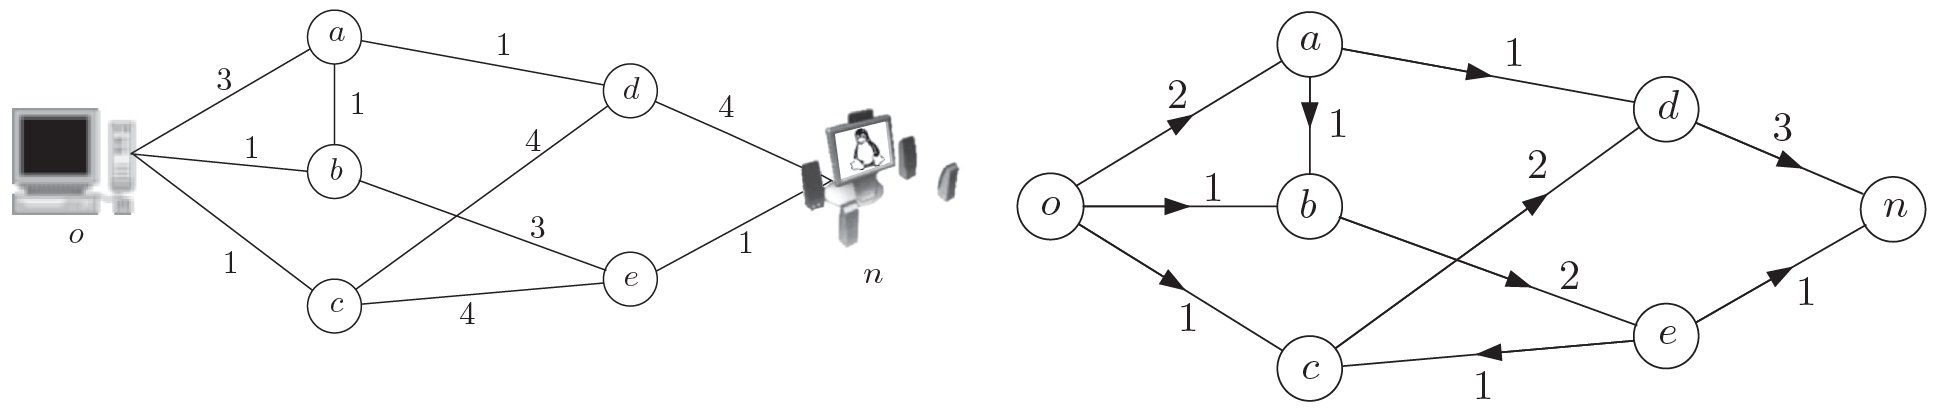


--------------------------------------------------------------------------------------------------------------------------------------------------------

# Ice Cream All Year Round

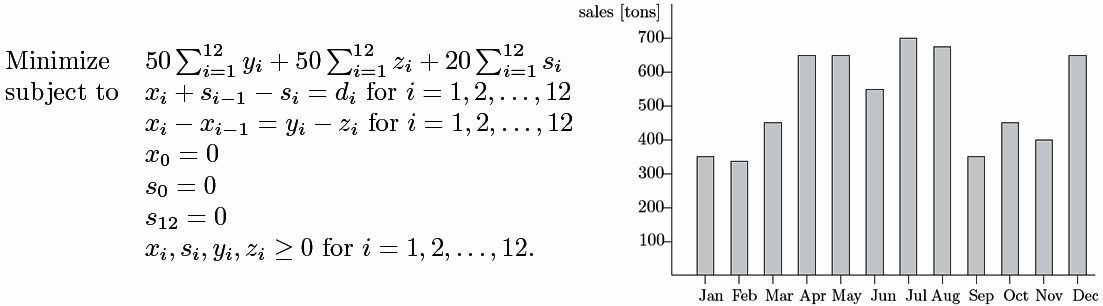

In [8]:
sales_data = np.array([350, 325, 450, 650, 650, 550, 700, 650, 350, 450, 400, 650])     # or demand/month(i)
months = 12

x = cp.Variable(months)    # production in each month
s = cp.Variable(months)    # surplus left at the end of each month
y = cp.Variable(months)    # free variable
z = cp.Variable(months)    # linear relax

constraints = [x[i] + s[i-1] - s[i] == sales_data[i] for i in range(0, 11)]
constraints += [x[i] - x[i-1]  == y[i] - z[i] for i in range(0, 11)]
constraints += [s[-1] == 0, s[11] == 0]

for i in range(months):           # Non-negativity constraints
    constraints.append(x[i] >= 0)
    constraints.append(s[i] >= 0)
    constraints.append(y[i] >= 0)
    constraints.append(z[i] >= 0)

cost_change_y = 50 * cp.sum(y)
cost_change_z = 50 * cp.sum(z)
cost_storage = 20 * cp.sum(s)
objective = cp.Minimize(cost_change_y + cost_change_z + cost_storage)

prob = cp.Problem(objective, constraints)
prob.solve(solver)

print('The optimal objective value is:', round(prob.value, 2))
print('---------------------------------------------------------------------------------------------------------------------------------------------')
print('Production Quantities_x (tons/month):', np.round(np.maximum(x.value, 0), 0))
print('---------------------------------------------------------------------------------------------------------------------------------------------')
print('Surplus levels_s (tons/month):', np.round(np.maximum(s.value, 0), 0))
print('\nQuantities y:', np.round(np.maximum(y.value, 0), 2))
print('Quantities z:', np.round(np.maximum(z.value, 0), 2))

The optimal objective value is: 30333.33
---------------------------------------------------------------------------------------------------------------------------------------------
Production Quantities_x (tons/month): [350. 350. 458. 633. 633. 633. 633. 633. 400. 400. 400. 350.]
---------------------------------------------------------------------------------------------------------------------------------------------
Surplus levels_s (tons/month): [ 0. 25. 33. 17.  0. 83. 17.  0. 50.  0.  0.  0.]

Quantities y: [  0.     0.   108.33 175.     0.     0.     0.     0.     0.     0.
   0.     0.  ]
Quantities z: [  0.     0.     0.     0.     0.     0.     0.     0.   233.33   0.
   0.     0.  ]


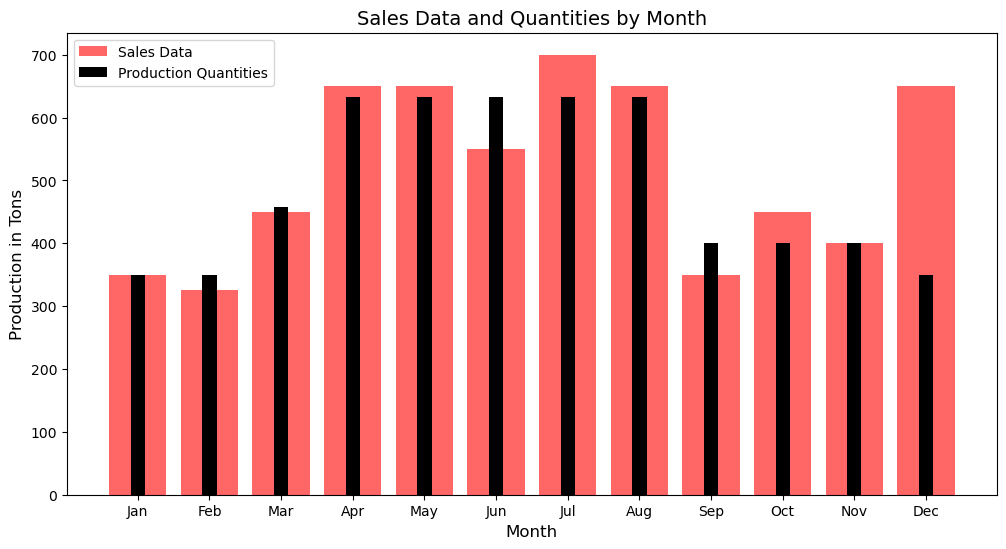

Scenario: if we set zero storage costs


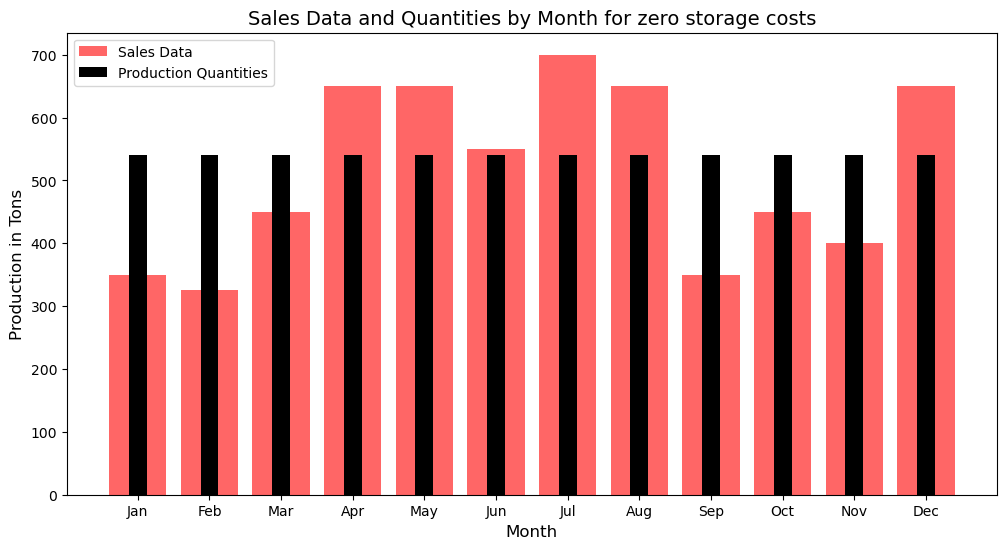

In [9]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
production_x = (np.round(np.maximum(x.value, 0), 2))

plt.figure(figsize=(12, 6))
bar_l = [i+1 for i in range(12)]

plt.bar(bar_l, sales_data, width=0.8, label='Sales Data',color='red', alpha=0.6)
plt.bar(bar_l, production_x, width=0.2, label='Production Quantities',color='black')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Production in Tons', fontsize=12)
plt.title('Sales Data and Quantities by Month', fontsize=14)
tick_pos = [i for i in bar_l]
plt.xticks(tick_pos, months)
plt.legend(loc='upper left')
plt.show()

print("Scenario: if we set zero storage costs")

sales_data = np.array([350, 325, 450, 650, 650, 550, 700, 650, 350, 450, 400, 650])     # or demand/month(i)
months = 12

x = cp.Variable(months)    # production in each month
s = cp.Variable(months)    # surplus left at the end of each month
y = cp.Variable(months)    # free variable
z = cp.Variable(months)    # linear relax

constraints = [x[i] + s[i-1] - s[i] == sales_data[i] for i in range(0, 11)]
constraints += [x[i] - x[i-1]  == y[i] - z[i] for i in range(0, 11)]
constraints += [s[-1] == 0, s[11] == 0]

for i in range(months):           # Non-negativity constraints
    constraints.append(x[i] >= 0)
    constraints.append(s[i] >= 0)
    constraints.append(y[i] >= 0)
    constraints.append(z[i] >= 0)

cost_change_y = 50 * cp.sum(y)
cost_change_z = 50 * cp.sum(z)
cost_storage = 0.01 * cp.sum(s)    #non-zero storage cost
objective = cp.Minimize(cost_change_y + cost_change_z + cost_storage)

prob = cp.Problem(objective, constraints)
prob.solve(solver)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
production_x = (np.round(np.maximum(x.value, 0), 2))

plt.figure(figsize=(12, 6))
bar_l = [i+1 for i in range(12)]

plt.bar(bar_l, sales_data, width=0.8, label='Sales Data',color='red', alpha=0.6)
plt.bar(bar_l, production_x, width=0.25, label='Production Quantities',color='black')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Production in Tons', fontsize=12)
plt.title('Sales Data and Quantities by Month for zero storage costs', fontsize=14)
tick_pos = [i for i in bar_l]
plt.xticks(tick_pos, months)
plt.legend(loc='upper left')
plt.show()

When we have no storage costs, its logical that we would have a mean value for production to save on cost of changing production..


--------------------------------------------------------------------------------------------------------------------------------------------------------

# Fitting a Line: Least Squares optimization

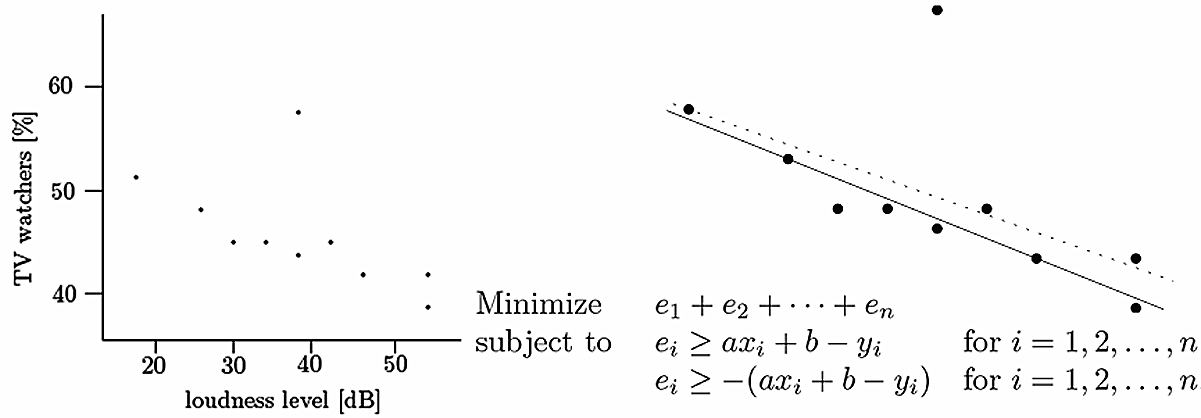

In [10]:
points = [(12, 52), (25, 48), (30, 45), (35, 45), (37, 58), (38, 44), (43, 46), (46, 43), (52, 38), (52, 43)]
x_i, y_i = zip(*points)  #  separate lists

a = cp.Variable()  # Slope of the line
b = cp.Variable()  # Intercept of the line
e = cp.Variable(len(x_i))  # Errors

objective = cp.Minimize(cp.sum(e))
constraints = [e >= cp.multiply(a, x_i) + b - y_i, 
               e >= -(cp.multiply(a, x_i) + b - y_i)]

prob = cp.Problem(objective, constraints)
prob.solve(solver)

print('The optimal slope (a) is:', a.value)
print('The optimal intercept (b) is:', b.value)
y_predicted = a.value * np.array(x_i) + b.value

residuals = np.array(y_i) - y_predicted  #RSS
SS_res = np.sum(residuals**2)
mean_y = np.mean(y_i)                    #TSS
SS_tot = np.sum((np.array(y_i) - mean_y)**2)
R_squared = 1 - (SS_res / SS_tot)           # R2
print('The R-squared value is:', R_squared)

The optimal slope (a) is: -0.2380952387362782
The optimal intercept (b) is: 53.95238097419947
The R-squared value is: 0.298154215033302


## Best fit acquired from excel:
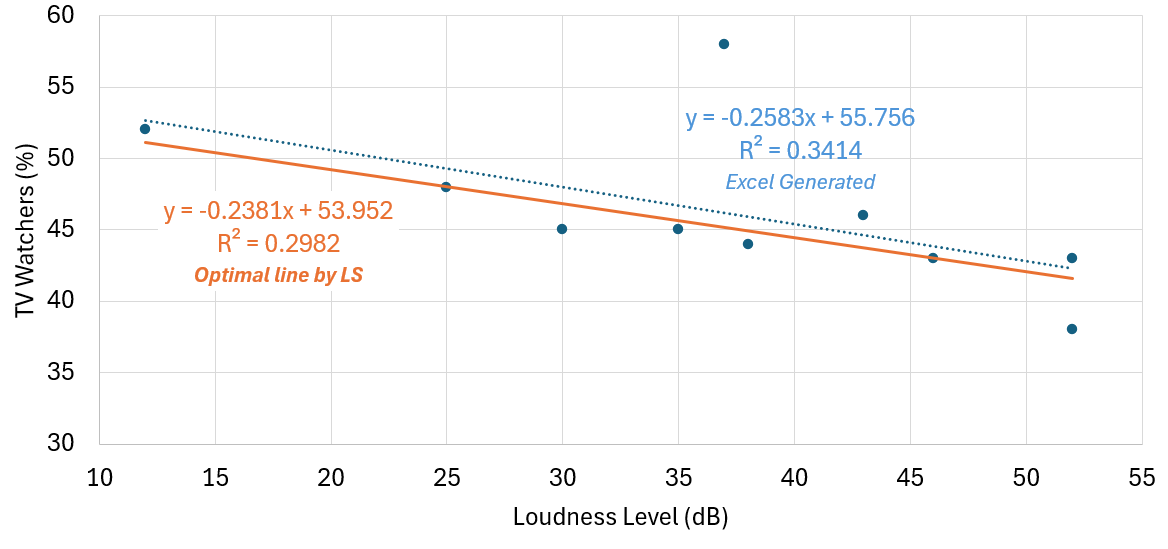
### Maybe excel uses some other (better) algorithm to calculate the best fit line..


--------------------------------------------------------------------------------------------------------------------------------------------------------

# Cutting Paper Rolls

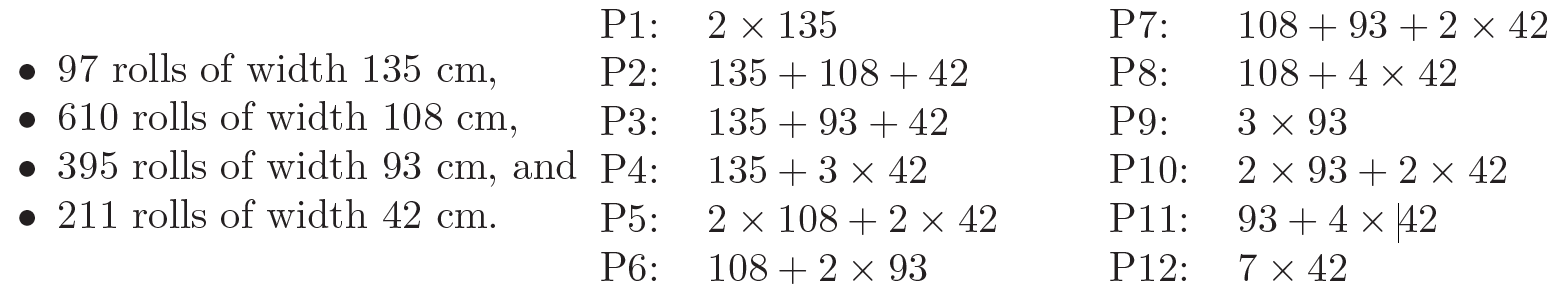

In [11]:
demand_135 = 97
demand_108 = 610
demand_93 = 395
demand_42 = 211

P = cp.Variable(12, integer=True)
cuts_from_pattern = {
    '135': [2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    '108': [0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0],
    '93': [0, 0, 1, 0, 0, 2, 1, 0, 3, 2, 1, 0],
    '42': [0, 1, 1, 3, 2, 0, 2, 4, 0, 2, 4, 7],
}

constraints = [
    cp.sum([cuts_from_pattern['135'][i] * P[i] for i in range(12)]) >= demand_135,  # Rolls of width 135
    cp.sum([cuts_from_pattern['108'][i] * P[i] for i in range(12)]) >= demand_108,  # Rolls of width 108
    cp.sum([cuts_from_pattern['93'][i] * P[i] for i in range(12)]) >= demand_93,    # Rolls of width 93
    cp.sum([cuts_from_pattern['42'][i] * P[i] for i in range(12)]) >= demand_42,    # Rolls of width 42
]
constraints += [P[i] >= 0 for i in range(12)]
objective = cp.Minimize(cp.sum(P))

prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.GLPK_MI)  # GLPK_MI as integer programming solver

print('The minimal number of large rolls needed:', prob.value)
print('Number of each pattern to use:')
for i, val in enumerate(P.value, start=1):
    print(f'P{i}: \t{int(val)}')

The minimal number of large rolls needed: 453.0
Number of each pattern to use:
P1: 	49
P2: 	0
P3: 	0
P4: 	0
P5: 	206
P6: 	198
P7: 	0
P8: 	0
P9: 	0
P10: 	0
P11: 	0
P12: 	0


So, we would have/require, according to the optimal solution:
- 98/97 rolls of width 135 cm
- 610/610 rolls of 108 cm
- 396/395 rolls of 93 cm
- 412/211 rolls of 42 cm

That is optimal for the minimum number of rolls with minimum wastate, if our goal was minimum number of rolls, despite any wastage from the 3m manifactured roll, it would mean a different formulation for the problem, with possibly a slightly different solution..


--------------------------------------------------------------------------------------------------------------------------------------------------------

## Space Colonies (Bipartite Graph)

There are 4 space colonies, each of which  requires a certain number of plasma conduits. There are 3 starbases in the vicinity. Each of them has total number of conduits they can spare and supply to the colonies. For each pair of starbase and colony, there is an associated cost for sending a cargo ship  (each of which carries one plasma conduit), as shown in the table below:


\begin{array}{l|c|c|c|c|c} 
      & Triacus & New Berlin  & Strnad  & Vega  & supply\\ \hline
 Farpoint &   6 &  9 & 10 & 8 & 35\\
 Yorktown &  9 & 5 & 16 & 14 & 40\\
 Earhart & 12 &  7 & 13 & 9 & 50\\ \hline
    demand & 20 &30&30&45& \left(\sum=125\right) \\ 
\end{array}

Your goal is to supply the colonies the plasma conduits they need, at minimum cost.


* Consider the general *transportation problem*: where there are $\bf{n}$ colonies and $\bf{m}$ bases and the costs are given by a $\bf{m} \times \bf{n}$ matrix $\mathcal{C}$, demand and supply are given by arrays $\bf{d}$ and $\bf{s}$ respectively. Formulate a LP to solve the problem.

* Code the LP in CVXPY, input the data for the space colonies manually and use CVXPY to solve the LP. Submit your code and write down the solution and objective.

* Use CVXPY to show what  the  effect  on the model and the optimal solution would be if each of the starbases could supply five more conduits.

In [12]:
solver=cp.ECOS

C = np.array([[6,9,10,8],[9,5,16,14],[12,7,13,9]])              # Cost of transport matrix
d = np.array([20,30,30,45])                                     # Demand matrix
s = np.array([35,40,50])                                        # Supply matrix

m = len(s)  # m number of starbases (1: Farpoint, 2: Yorktown, 3: Earhart)
n = len(d)  # n number of space colonies (1: Triacus, 2: NewBerlin, 3: Strnad, 4: Vega)

X = cp.Variable((m,n), nonneg=True)     # decision variables (x_ij): number of plasma conduits from m (starbase) to n (space colonies)

supply = [cp.sum(X[i, :]) == s[i] for i in range(m)]
demand = [cp.sum(X[:, j]) == d[j] for j in range(n)]

objective = cp.Minimize(cp.sum(cp.multiply(C, X)))
prob_simple = cp.Problem(objective, supply + demand)
prob_simple.solve(solver)

print("\nThe optimal value is", round(prob_simple.value,4))
print("A solution X is")
print(X.value.round(0))
# print("A dual solution is")
# print(prob_simple.constraints[0].dual_value)


The optimal value is 1020.0
A solution X is
[[10.  0. 25.  0.]
 [10. 30.  0.  0.]
 [ 0.  0.  5. 45.]]


**Explain why the solution was integral**

**Ans.** We can identify the transportation problem of the space colonies as a bipartite graph, and check if its optimization formulation confirms with the Hoffman Kruskal's Theorem, in order to prove that the solution provided by the LP relaxation will be the same as the ILP solution (integral).

Here, our edges (vector **x** $\geq 0$) are number of optimal transported plasma conduits with cost of transport, which will be a (16x1) vector.
While, our constraints would be of the form: **\(Ax=b\)**, formulated as the following.

Say our bipartite graph is formed as 4 space colonies (a, b, c, d) on a side, and 3 starbases (1, 2, 3) on the other side. We would have martrix A, as 16 routes between these as columns and 4 (demand) + 3 (supply) = 7 rows..
Incidence **Matrix \( A \) (7x16):**
\begin{bmatrix}
1    &    1    &    1    &    1    &    0    &    0    &    0    &    0    &    0    &    0    &    0    &    0 \\
0    &    0    &    0    &    0    &    1    &    1    &    1    &    1    &    0    &    0    &    0    &    0 \\
0    &    0    &    0    &    0    &    0    &    0    &    0    &    0    &    1    &    1    &    1    &    1 \\
1    &    0    &    0    &    0    &    1    &    0    &    0    &    0    &    1    &    0    &    0    &    0 \\
0    &    1    &    0    &    0    &    0    &    1    &    0    &    0    &    0    &    1    &    0    &    0 \\
0    &    0    &    1    &    0    &    0    &    0    &    1    &    0    &    0    &    0    &    1    &    0 \\
0    &    0    &    0    &    1    &    0    &    0    &    0    &    1    &    0    &    0    &    0    &    1  
\end{bmatrix}


**Vector \( x \) (12x1) as transpose of:**
\begin{bmatrix}
6*x_{1a}  &  9*x_{1b}  &  10*x_{1c}  &  8*x_{1d}  &  9*x_{2a}  &  5*x_{2b}  &  16*x_{2c}  &  14*x_{2d}  &  12*x_{3a}  &  7*x_{3b}  &  13*x_{3c}  &  9*x_{3d}
\end{bmatrix}
**Vector \( b \) (7x1) as transpose of:**
\begin{bmatrix}
35  &  40  &  50  &  20  &  30  &  30  &  45
\end{bmatrix}

As per the Hoffman-Kruskal Theorem, the vertices of the region {x: **Ax $\leq$ b**} are integral if **A** is a TUM, and **b** is integral. As seen above, vector **b** is integral. Checking for sufficient conditions for Matrix A being TUM:
- matrix entries are {0,1}
- each column of matrix A has at-most 2 non-zeros
- rows, when partitioned as demand and supply constraint sets: in each column the 2 non-zeros are on different sets (same +ve sign)


--------------------------------------------------------------------------------------------------------------------------------------------------------

# Another Min-cut Bipartite (HyperGraph)
Consider a number of interpreters (Olof, Petra, Qamar,
  Rachel, Soren and Tao), as well as a set of languages (Arab,
  Bengali, Cantonese, Dutch, English, French and German). Each
  interpreter speaks a number of different languages (abbreviated by
  first letter), and has a certain per-diem integer cost:
\begin{array}{lll}
Interpreter & Languages & Cost\\
O & ABD & 3\\
P & C & 1\\
Q & CDG & 1\\
R & B & 2\\
S & G & 4\\
T & EF & 1\\
\end{array}

**A *hypergraph* is a structure $H = (V,E)$ where $V$ is a set of vertices and $E$ is a collection of subsets of $V$. The special case when all subsets $e \in E$ have size exactly $2$ corresponds to the familiar case of a graph. A vertex cover in such a hypergraph is a subset $U \subseteq V$ such that $e \cap U \not = \emptyset$ for each $e \in E$ (note that this reduces to the usual vertex cover in graphs). Show that the problem of finding interpreters can be formulated as a vertex cover problem in a sutable hypergraph.**

**Answer.** The problem of finding interpreters for a set of languages can indeed be modeled as a vertex cover problem in a hypergraph, as described below:

- **Vertices**: Each vertex $V$ in the hypergraph represents an interpreter [$O, P, Q, R, S, T$].
- **Hyperedges**: Each subset $e \in E$, the collection of subsets of $V$, corresponds to a language that needs interpretation. The subset [A (Arab) hyperedge: {O}; B (Bengali) hyperedge: {O, R} ; C (Cantonese) hyperedge: {P, Q} ; D (Dutch) hyperedge: {O, Q} ; E (English) hyperedge: {T} ; F (French) hyperedge: {T} ; G (German) hyperedge: {Q, S}] contains all interpreters who can translate that language.
- **Vertex Cover**: A vertex cover $U \subseteq V$ in this context is a set of interpreters such that for every language (subset $e \in E$), there is at least one interpreter in $U$ who can translate that language, ensuring all languages are covered.
- **Cost**: It represents the cost $c = [3, 1, 1, 2, 4, 1]$ of interpreters $O, P, Q, R, S, T$ respectively

The objective is to find the minimum-cost vertex cover, which corresponds to the set of interpreters that can cover all languages at the lowest possible total cost in the hypergraph.
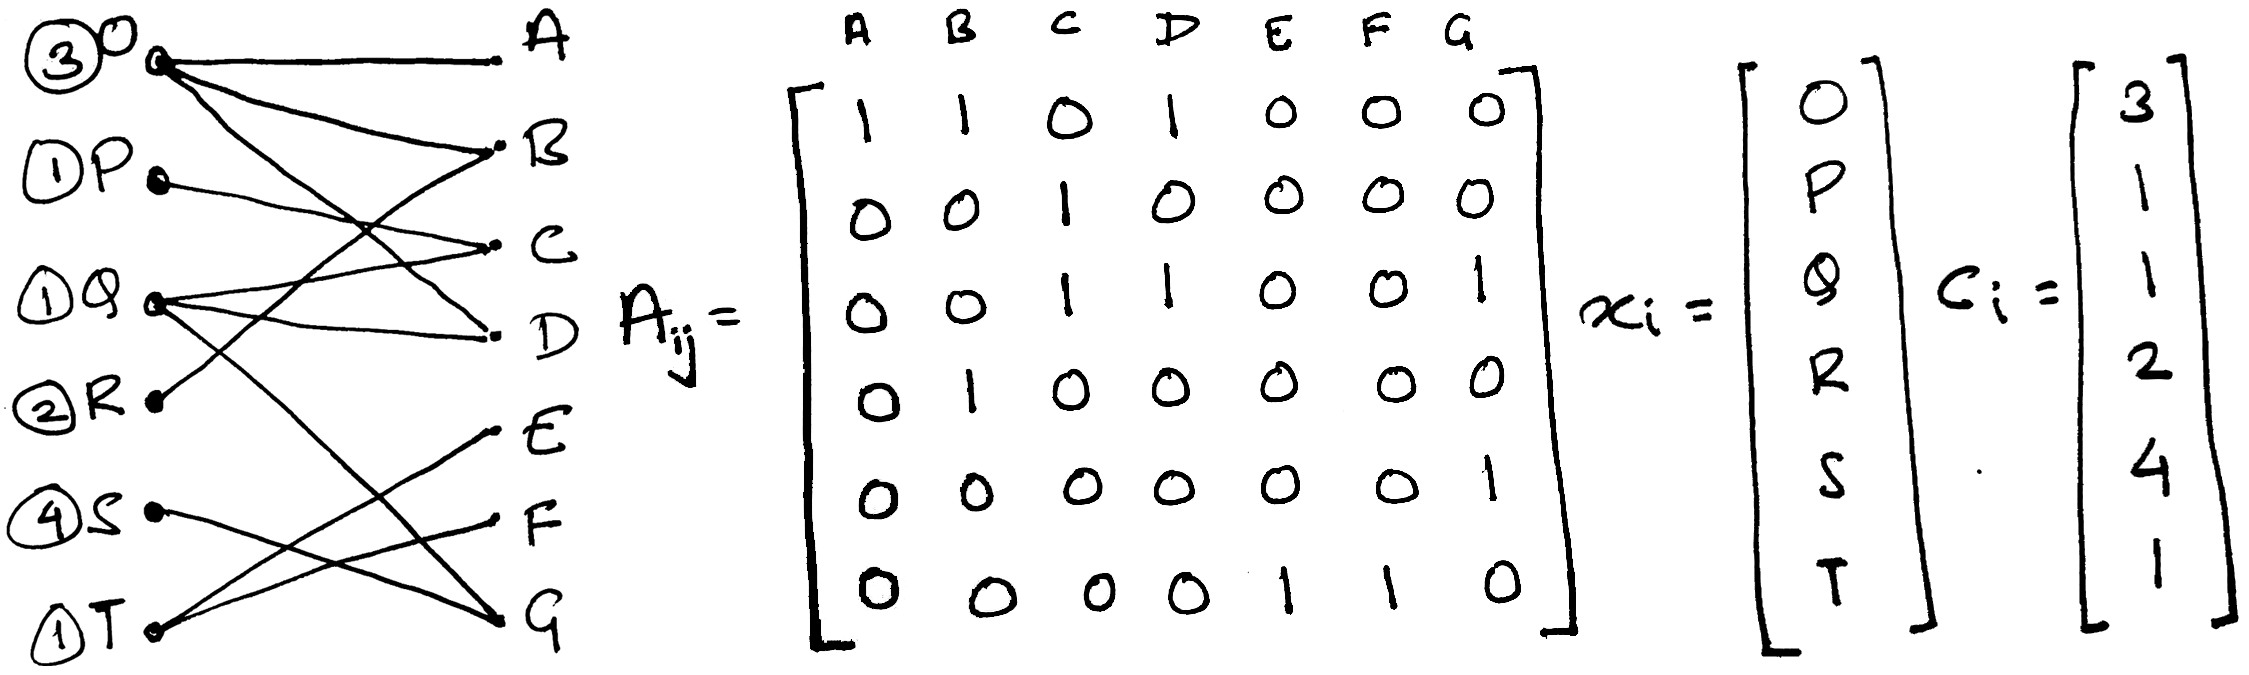

**Develop a ILP formulation to finding the vertex cover of minimum cost in a hypergraph. The hypergraph can be represented as a $|V| \times |E|$ binary matrix $A$ where $A[i,j] = 1$ iff vertex $i$ is in edge $j$ and 0 otherwise. The costs for vertices are in an array $\texttt{c}$ where the cost of picking vertex $i$ is $c[i]$. Use the ILP formulation for the VC problem to hire the cheapest set of interpreters such that all languages are covered. Input the data above manuallly and solve it using **CVXPY**'s integer solver.**

**Answer.** The ILP Formulation for Minimum Cost Vertex Cover in a Hypergraph can be formulated as follows;

- **Variables:**   Let $x_i$ be a binary variable for each interpreter $i$. $x_i = 1$ if interpreter $i$ is selected, and $0$ otherwise.

- **Constraints:**   For every language (edge $j$), there must be at least one interpreter who can speak that language.
  $$
  \sum_{i \in V: A[i,j] = 1} x_i \geq 1 \quad \forall j \in E
  $$
  where $A[i,j] = 1$ iff interpreter $i$ can speak the language represented by edge $j$, and $E$ is the set of all languages (hyperedges);
  
  and while, $x_i$ are binary
  $$
  x_i \in \{0, 1\} \quad \forall i \in V
  $$

- **Objective Function:**   Minimize the total cost of selected interpreters.
  $$  
  \min \sum_{i \in V} c[i] \cdot x_i  
  $$
  where $c[i]$ is the cost of selecting interpreter $i$, and $V$ is the set of all interpreters.


In [13]:
### ILP Solution

ox = cp.Variable(integer = True)
px = cp.Variable(integer = True)
qx = cp.Variable(integer = True)
rx = cp.Variable(integer = True)
sx = cp.Variable(integer = True)
tx = cp.Variable(integer = True)

constraints = [ox >= 1, ox+rx >= 1, px+qx >= 1, ox+qx >= 1, tx >= 1, qx+sx >=1,
               ox>=0,px >=0, qx>= 0, rx>= 0,sx>=0,tx>=0]

objective = cp.Minimize(3*ox+px+qx+2*rx+4*sx+tx)

MVC = cp.Problem(objective, constraints)
MVC.solve()

print('The optimal objective value is:', MVC.value)
print('ox =', (ox.value.round(4)))
print('px =', (px.value.round(4)))
print('qx=', (qx.value.round(4)))
print('rx', (rx.value.round(4)))
print('sx =', (sx.value.round(4)))
print('tx =', (tx.value.round(4)))

The optimal objective value is: 5.0
ox = 1.0
px = 0.0
qx= 1.0
rx 0.0
sx = 0.0
tx = 1.0


**Pass to the LP relaxation and solve it using CVXPY.** 

In [14]:
### Q3.3 LP relaxation with rounding solution

ox = cp.Variable(integer = False)
px = cp.Variable(integer = False)
qx = cp.Variable(integer = False)
rx = cp.Variable(integer = False)
sx = cp.Variable(integer = False)
tx = cp.Variable(integer = False)

constraints = [ox >= 1, ox+rx >= 1, px+qx >= 1, ox+qx >= 1, tx >= 1, qx+sx >=1, ox>=0,px >=0, qx>= 0, rx>= 0,sx>=0,tx>=0]
objective = cp.Minimize(3*ox + px + qx + 2*rx + 4*sx + tx)

MVC = cp.Problem(objective, constraints)
MVC.solve(solver)

print('The optimal objective value for the LP relaxation is:', MVC.value)
print('ox =', (ox.value))
print('px =', (px.value))
print('qx=', (qx.value))
print('rx', (rx.value))
print('sx =', (sx.value))
print('tx =', (tx.value))

The optimal objective value for the LP relaxation is: 4.999999999795173
ox = 0.9999999999360603
px = 7.269626605275421e-11
qx= 1.0000000003165377
rx -5.9799320583189065e-12
sx = -8.339751966287096e-11
tx = 0.9999999999433085


In [15]:
print("Rounded values for the LP relaxation:")
print('ox =', (ox.value.round(0)))
print('px =', (px.value.round(0)))
print('qx=', (qx.value.round(0)))
print('rx', (rx.value.round(0)))
print('sx =', (sx.value.round(0)))
print('tx =', (tx.value.round(0)))

cost = 3*ox.value.round(0)+px.value.round(0)+ qx.value.round(0)+ 2*rx.value.round(0)+4*sx.value.round(0) + tx.value.round(0)
print(f"Total cost after rounding = {cost}")

Rounded values for the LP relaxation:
ox = 1.0
px = 0.0
qx= 1.0
rx -0.0
sx = -0.0
tx = 1.0
Total cost after rounding = 5.0


We find that the ILP and the LP relaxation solution are **both the same** for the regular mathematical rounding rule for this problem.

**Why are the two solutions above the same (but different).**

**Answer.** The two solutions are the same! Again, as per the Hoffman-Kruskal Theorem, the solutions for the ILP and the rounded LP relaxation would provide same/integral solutions if sufficient conditions for Matrix A being TUM are met [as $A^T x \geq b$ (b=1 is int)] :
- matrix entries are {0,1}
- each column of matrix A has at-most 2 non-zeros (as shown above)
- rows, when partitioned as demand and supply constraint sets (we can partition as set for i being (O,P,S) and (T,Q,R)): in each column the 2 non-zeros are on different sets (same +ve sign)


--------------------------------------------------------------------------------------------------------------------------------------------------------

# Minimum Weight Vertex Cover (VC) Problem

Given an undirected graph $G=(V, E)$, with node set $V$ and edge set $E$, where each node has a positive weight $w(v)$ associated with it (see figure), the goal is to select a subset $V'\subseteq V$ of nodes such that every edge has at least one node incident to it, and the total selected node weight $\sum_{v\in V'} w(v)$ is minimized.

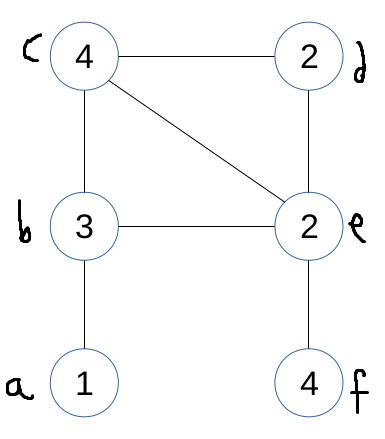

**Formulate the ILP for the VC problem for the example below, and solve it using **CVXPY** integer solver, for instance, `myVar = cp.Variable(<dim>, integer=True)`.**

**Ans.** The ILP formulation for the Minimum Weight Vertex Cover (VC) problem is as follows:
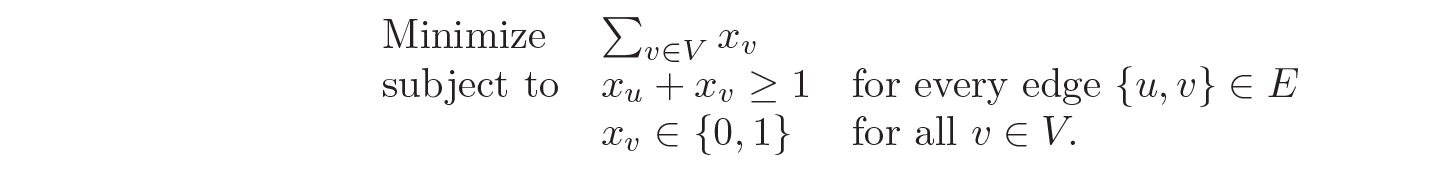

where $ V $ is the set of vertices, $ E $ is the set of edges, $ w(v) $ is the weight of vertex $ v $, and $ x_v $ is a binary variable that is 1 if vertex $ v $ is included in the vertex cover and 0 otherwise.

For each of the nodes, we give them a name from a to f, and formulate the variables as $ax,bx,cx,dx,ex,fx$.
The objective function will be to minimize the total cost of these variables times their weight.

$$
Obj = argMin( ax+3*bx+4*cx+2*dx+2*ex+4*fx)
$$

The constraints will be that each edge has to be connected at least once. And that our variables are positive integers. (Our variables should be boolean values, but as we are minimizing integer values they will not be larger than one.)

$ ax+bx \geq 1 ,$ $\qquad$ $ bx+cx \geq 1,$ $\qquad$ $ bx+ex \geq 1 ,$ $\qquad$ $  cx+dx \geq 1,$ $\qquad$ $ cx+ex \geq 1 ,$  $\qquad$ $ dx+ex \geq 1,$   $\qquad$ $ex+fx \geq 1$

$ ax\geq 0, $ $\qquad$ $  bx \geq 0, $ $\qquad$ $  cx \geq 0,$ $\qquad$ $  dx \geq 1, $ $\qquad$ $  ex \geq 0, $ $\qquad$ $  fx \geq 0$ $\qquad$(non-negativity)

In [16]:
# Interger Linear Programming solution

ax = cp.Variable(integer = True)       # binary variables for each node
bx = cp.Variable(integer = True)
cx = cp.Variable(integer = True)
dx = cp.Variable(integer = True)
ex = cp.Variable(integer = True)
fx = cp.Variable(integer = True)

constraints = [ax+bx >= 1, bx+cx >= 1, bx+ex >= 1, cx+dx >= 1, cx+ex >= 1, dx+ex >=1, ex+fx >=1,
               ax>=0, bx >=0, cx>= 0, dx>= 0, ex>=0, fx>=0]

#  Minimize the sum of the weighted variables (weights are assigned as defined in the problem)
objective = cp.Minimize(ax+3*bx+4*cx+2*dx+2*ex+4*fx) 
MVC = cp.Problem(objective, constraints)
MVC.solve()

print('The optimal objective value (weight of the selected nodes) is:', round(MVC.value, 2))
print('The nodes in the minimum weight vertex cover are:\nax =', (ax.value))
print('bx =', (bx.value))
print('cx =', (cx.value))
print('dx =', (dx.value))
print('ex =', (ex.value))
print('fx =', (fx.value))

The optimal objective value (weight of the selected nodes) is: 7.0
The nodes in the minimum weight vertex cover are:
ax = 1.0
bx = 0.0
cx = 1.0
dx = 0.0
ex = 1.0
fx = 0.0


**Pass to the LP relaxation and solve it using **CVXPY** and comment on the relation between the two solutions.**
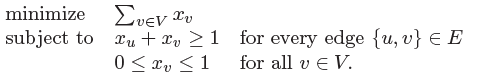

In [17]:
# binary vars for each node as continuous vars within [0, 1] for LP relaxation
ax = cp.Variable(integer = False)
bx = cp.Variable(integer = False)
cx = cp.Variable(integer = False)
dx = cp.Variable(integer = False)
ex = cp.Variable(integer = False)
fx = cp.Variable(integer = False)

# Constraints and objective are the same as in abv ILP formulation
constraints = [ax+bx >= 1, bx+cx >= 1, bx+ex >= 1, cx+dx >= 1, cx+ex >= 1, dx+ex >=1,ex+fx >=1,
               ax>=0,bx >=0, cx>= 0, dx>= 0,ex>=0,fx>=0]
objective = cp.Minimize(ax+3*bx+4*cx+2*dx+2*ex+4*fx)
MVC = cp.Problem(objective, constraints)
MVC.solve(solver)

print('The LP relaxation optimal objective value is:', round(MVC.value, 2))
print('ax =', (ax.value.round(4)))
print('bx =', (bx.value.round(4)))
print('cx=', (cx.value.round(4)))
print('dx', (dx.value.round(4)))
print('ex =', (ex.value.round(4)))
print('fx =', (fx.value.round(4)))

The LP relaxation optimal objective value is: 7.0
ax = 0.4847
bx = 0.5153
cx= 0.4847
dx 0.5153
ex = 1.0
fx = -0.0


The ILP and LP relaxation solutions both achieved the same total weight of 7.0 for the vertex cover. While the ILP restricts variables to 0 or 1, defining node presence in the vertex cover; LP Relaxation allows continuous variable values between 0 and 1, indicating partial node inclusion. Some comments on the relation between the solutions:
- **LP as Lower Bound**: Typically gives a lower bound on ILP's optimal value; coincidentally the same here.
- **Fractional Insights**: LP's fractional values suggest node significance for edge coverage.
- **Solution**: The identical objective values hint at special graph properties or a well-posed problem instance.

**Apply the rounding rule discussed in class to the optimal LP solution to obtain a solution to the ILP and compare it to the optimal ILP solution.**

In [18]:
# Rounding as discussed in class
print("\n **LP rounding:**")
ax = np.round(ax.value)
bx = np.round(bx.value)
cx = np.round(cx.value)
dx = np.round(dx.value)
ex = np.round(ex.value)
fx = np.round(fx.value)

print(f' ax = {ax} \n bx = {bx} \n cx = {cx} \n dx = {dx} \n ex = {ex} \n fx = {fx} \n')
newcost = ax + 3*bx + 4*cx + 2*dx + 2*ex + 4*fx
print('The LP rounded optimal objective value is:', round(newcost, 2))


 **LP rounding:**
 ax = 0.0 
 bx = 1.0 
 cx = 0.0 
 dx = 1.0 
 ex = 1.0 
 fx = -0.0 

The LP rounded optimal objective value is: 7.0


The ILP and LP rounding solutions again achieved the same total weight of 7.0 for the vertex cover. Comparing the relation between the solutions:
- **Different Vertex Sets**: ILP chose nodes: $a,c,e$ ; while LP rounding chose nodes: $b, d, e$.
- **Same Cost, Different Cover**: Despite different vertices, both methods resulted in the same cost due to graph structure.
- **Rounding Validity**: Rounding LP solutions as a heuristic worked here but does not always guarantee an optimal ILP solution.


--------------------------------------------------------------------------------------------------------------------------------------------------------

# Large Scale Random Graph (rounding)

Consider the ILP and its LP relaxation corresponding to the VC problem for the graph $G$ given in the data file. This is a ***random graph*** $G(n,p)$ with $n=100$ vertices generated as follows: for each pair of vertices **independently**, we add an edge with probability $p=0.1$ (so the graph has about 1000 edges).

In [19]:
# Q4.a ILP formulation optimal minimum vertex cover
os.listdir("C:/Users/omkarp/Downloads/Opti/")
graph_data = pd.read_csv("graph.txt", sep=" ", header=None)

A = np.array(graph_data)  # A is adjacency matrix of the graph
# print(A.shape[0])

X = cp.Variable(A.shape[0],integer = True)
constraints = [X[i] + X[j] >= 1 for i in range(A.shape[0]) for j in range(i) if A[i, j] == 1]
objective = cp.Minimize(cp.sum(X))

prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.GLPK_MI)  

print('The minimum number of vertices in the vertex cover are ', prob.value)
print('\nThe vertices/node indices in the minimum VC of graph are:\n', np.where(X.value)[0])

The minimum number of vertices in the vertex cover are  70.0

The vertices/node indices in the minimum VC of graph are:
 [ 0  1  3  5  6  7  8  9 11 12 13 15 16 17 20 21 22 23 24 25 26 29 30 33
 34 35 37 38 39 41 42 43 44 48 49 50 51 53 54 55 60 61 63 65 67 68 69 70
 72 73 75 76 78 79 80 81 82 84 85 86 88 89 90 91 92 93 94 96 98 99]


All edges are covered.


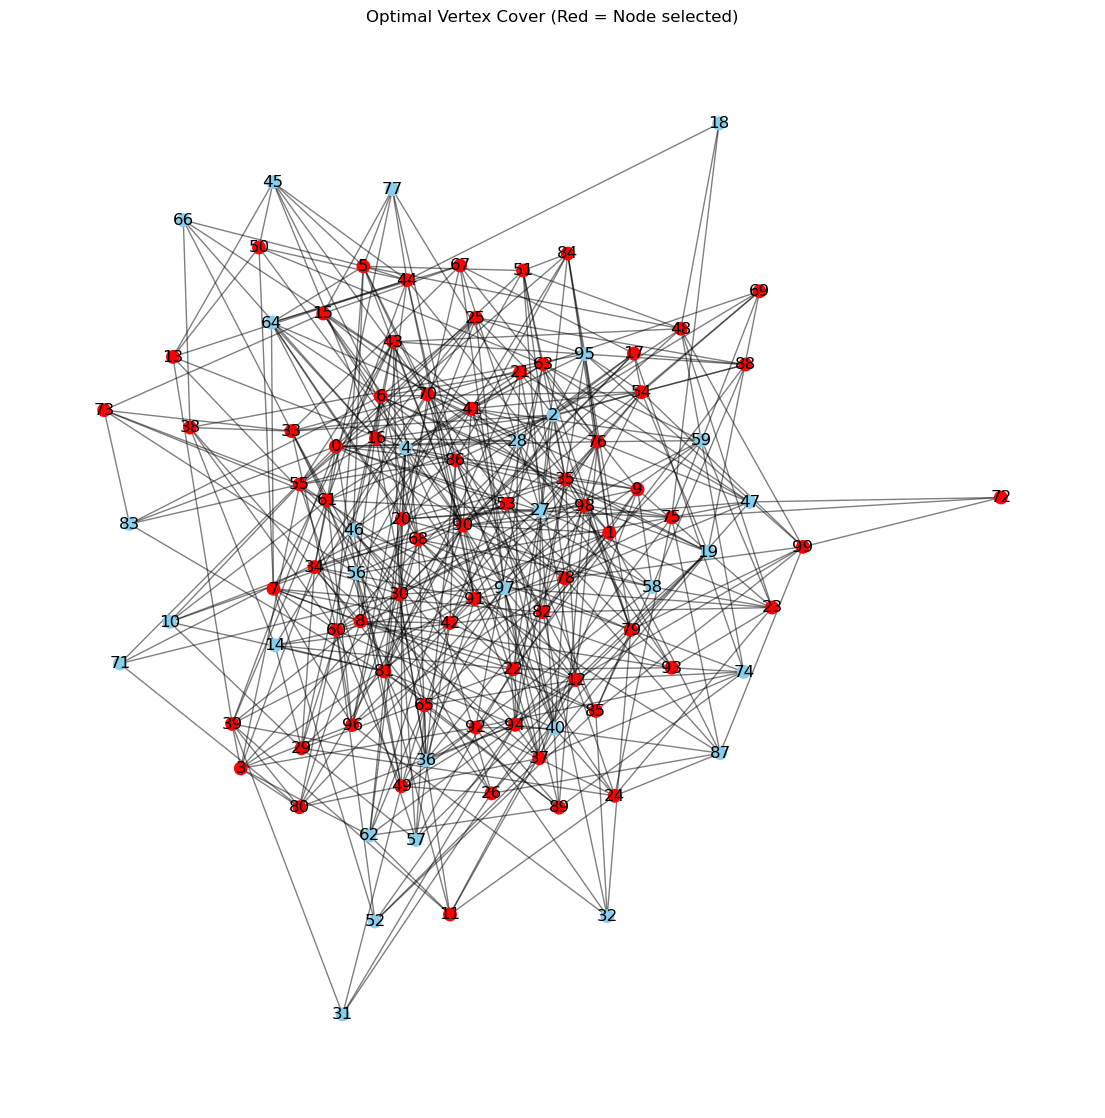

In [20]:
# Check for any uncovered edges
covered_edges = []
uncovered_edges = []
for i in range(A.shape[0]):
    for j in range(i):
        if A[i, j] == 1:
            if X.value[i] >= 0.5 or X.value[j] >= 0.5:
                covered_edges.append((i+1, j+1))
            else:
                uncovered_edges.append((i+1, j+1))

if not uncovered_edges:
    print('All edges are covered.')
else:
    print('Uncovered edges:', uncovered_edges)

# Check visually if all edges covered
G = nx.from_numpy_array(A)
node_colors = ['red' if value >= 0.5 else 'skyblue' for value in X.value]
pos = nx.spring_layout(G)

plt.figure(figsize=(14, 14))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=80)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title('Optimal Vertex Cover (Red = Node selected)')
plt.axis('off')
plt.show()

In [21]:
# LP relaxation formulation:
X_lp = cp.Variable(A.shape[0])

constraints_lp = [X_lp[i] + X_lp[j] >= 1 for i in range(A.shape[0]) for j in range(i) if A[i, j] == 1]
objective_lp = cp.Minimize(cp.sum(X_lp))
prob_lp = cp.Problem(objective_lp, constraints_lp)
result_lp = prob_lp.solve(solver)

print('The minimum number of vertices in the LP relax vertex cover are ', prob_lp.value)
print('\nThe vertices/node indices in the minimum VC of graph are:\n', np.where(X_lp.value)[0])

The minimum number of vertices in the LP relax vertex cover are  49.99999999992625

The vertices/node indices in the minimum VC of graph are:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [22]:
# LP relaxation with rounding rule as: "round off x >=0.5 to 1"

rounded_solution = np.where(X_lp.value >= 0.4999999999982,1,0)   # trial_n_error: this decimal value captures the minimal value for X_lp
# rounded_solution1 = np.around(X_lp.value, decimals=0) # .. this doesnt work due to python's calculation criteria (discussed below)..

number_of_nodes = np.sum(rounded_solution)
print('The rounded number of vertices in the vertex cover is', number_of_nodes)
print('The rounded vertices/node indices in the VC of the graph are:\n', np.where(rounded_solution > 0)[0])

The rounded number of vertices in the vertex cover is 72
The rounded vertices/node indices in the VC of the graph are:
 [ 0  1  2  4  5  6  7  8  9 12 15 16 19 20 22 23 24 26 27 28 29 30 33 34
 35 37 38 39 40 41 42 43 44 45 47 48 49 51 53 54 55 56 59 60 61 62 63 65
 67 68 70 73 74 75 76 78 79 80 81 82 85 86 88 90 91 92 94 95 96 97 98 99]


In comparison with ILP, the LP relax will always derive inferior solution here, as the considered graph does not conform to the concept of total unimodularity (TUM) coefficient matrix.
When solving this problem as LP-relaxed the solution becomes that all X values are close to 0.5. So when rounding we get a problem due to the accuracy of the rounding. If we round with $X$  $\geq$   $0.5$, we get:

 $ obj(X) = 50$

 This however is an unfeasable solution as the LP-relaxed gets a better than the ILP solution, which is not possible.

When we round with  $X$  $\geq$  0.4999999999982,
the solution eventually becomes:

$obj(X) = 72$

This solution is feasible and is close to ILP optimal value. The LP relaxation might indicate a balanced cost distribution that slightly favors including additional vertices when considering the precision-adjusted threshold, which reflects a scenario where many vertices are "just barely" not included at a 0.5 threshold.

Consider the following rounding rule: we build up the vertex cover incrementally starting with $S:= \emptyset$. Now consider the edges in $G$ in any order. If an edge $(u,v)$ is already covered by a vertex in $S$, do nothing. Otherwise add to $S$ the vertex $u$ if $x^*(u) \geq x^*(v)$, or $v$ otherwise (where ${\bf x}^*$ is the LP optimum solution computed in part (b).  Comment why this also results in a vertex cover and has cost no more than that corresponding to the rounding rule in part (b). Compare the cost of the solution produced by this rule to the optimal solution.

In [23]:
# LP relaxation (conti..) with rounding rule as defined
S = set() # vertex cover set S

# Iterate over all edges to apply the rounding rule. If neither of the vertices is already in S, add the one with a higher LP value
for i in range(A.shape[0]):
    for j in range(i):
        if A[i, j] == 1:
            if (i not in S) and (j not in S):
                if X_lp.value[i] >= X_lp.value[j]:
                    S.add(i)
                else:
                    S.add(j)

vertex_cover = list(S)
print('The size of the vertex cover obtained by the rounding rule is:', len(vertex_cover))
print('The vertices included in the vertex cover are:')
print(np.sort(vertex_cover))

The size of the vertex cover obtained by the rounding rule is: 73
The vertices included in the vertex cover are:
[ 0  1  2  4  5  6  7  8  9 12 13 15 16 19 20 22 23 24 26 27 28 29 30 33
 34 35 37 38 39 40 41 42 43 44 45 47 48 49 51 53 54 55 56 59 60 61 62 63
 65 67 68 70 73 74 75 76 78 79 80 81 82 85 86 88 90 91 92 94 95 96 97 98
 99]


We get a vertex cover with 73 vertices. This is almost the same solution found in part b). The reason for this also creating a vertex cover because all edges are checked and added if they are not in the set already. It achieves the same objective function as b), maybe because it is essentially doing the same as the rounding, but for only two vertices at a time. The one with the larger value is the better of the two vertices.
This solution is better for this problem in particular as all the values were very close to 0.5 and the rounding became difficult to execute well, due to how decimals are handled in python which lead to some rounding errors.

The solution achieved was $obj(X) = 73$ while the optimal solution was $obj(X) = 70$. This solution is not far off the optimum and was much faster to compute.

Summarizing for the effectiveness of the rounding rule applied to the LP relaxation solution for constructing a vertex cover:

- **LP Relaxation Basis**: For every edge $(u,v)$, the LP relaxation ensures $x(u) + x(v) \geq 1$, permitting fractional values for vertices.
- **Rounding Rule revision**: Iteratively includes a vertex with the higher LP value among the two endpoints of each uncovered edge, guaranteeing edge coverage.
- **Vertex Cover result**: Guarantees a vertex cover by selecting at least one endpoint for every edge based on LP solution values.
- **Cost Efficiency**: The cost does not exceed the LP solution, maintaining the vertex cover size within twice the optimal ILP solution size, adhering to known approximation bounds.
- **Comparison with Optimal ILP Solution**: The rounded solution, while potentially larger due to the integrality gap, provides an approximation within a factor of 2 of the optimal ILP solution size.

This rounding strategy offers a practical balance between theoretical optimality and computational efficiency for NP-hard problems like vertex cover.


--------------------------------------------------------------------------------------------------------------------------------------------------------

In [24]:
pass